# Cálculo de una cercha simple

## 1. Librerías

In [1]:
# Ubicación de la carpeta *struktura*
import sys
sys.path.append(r"C:\Users\fgrv\OneDrive\Documentos\PythonProjects\struktura")

import analisa.edeb as edb

## 2. Datos

Fuerzas en $kN$ y distancias en $m$

In [2]:
A1 = 50e-6  # m2
A2 = 35e-6 # m2
E = 200e6  # kN/m2 = kPa

In [3]:
# Instanciones de la clase Seccion
s1 = edb.Seccion(area=A1)
s2 = edb.Seccion(area=A2)

# Instanciación de la clase Material
m1 = edb.Material(elast_long=E)

In [4]:
# Coordenadas de los nudos, en el orden de enumeración
coords = [(0, 0), (3, 0), (7, 0), (3, 4)]

# Tabla de conectividad de las barras en el orden de enumeración
# Formato: [(#nudo_inicial, #nudo_final, num_de_material, num_de_seccion), ...]
conect = [(2, 3, 1, 1), (1, 4, 1, 2), (2, 4, 1, 2), (3, 4, 1, 1)]

# Restricciones {#nudo: (restX, restY), ...}
rest = {1: (1, 1), 2: (1, 1), 3: (0, 1)}

# Lista de materiales
mat = m1

# Lista de secciones
s = [s1, s2]

# Cargas nodales {#nudo: (Px, Py), ...}
cargas = {4: (-8, -10)}

## 3. Procesamiento

### 3.1 Preliminar

In [5]:
# Instanciación de la clase Reticulado
st = edb.Reticulado(datos_nudos=coords, restricciones=rest, datos_barras=conect,
                   materiales=mat, secciones=s, cargas_nodales=cargas)

### 3.2 Dibujo de la estructura para revisión

Con sus respectivas asignaciones numéricas.

Respecto a los apoyos:
- Triángulos en negro para los apoyos con restricción completa.
- Triángulos en colores para apoyos con restricción parcial
- Círculos para nudos sin restricciones

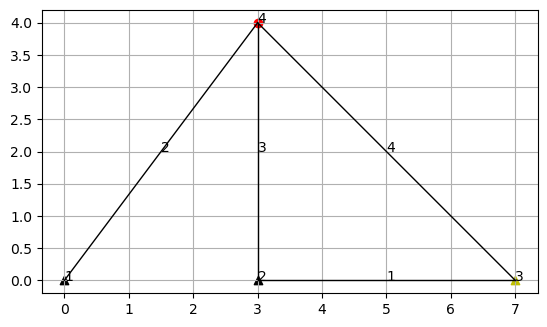

In [6]:
st.dibujar_nudos(num=True)
st.dibujar_barras(num=True)

### 3.3 Realización de los cálculos

In [7]:
# Cálculos
st.procesamiento()

## 4. Resultados

### 4.1 Valores de barras individuales que podrían interesar

In [8]:
# Tensión en la barra 2
b2 = st.barras()[1]
b2.tension()

-260500.73703443227

In [9]:
# Elongación de la barra 3
b3 = st.barras()[2]
b3.elongacion()

-0.0029916936487501835

In [10]:
# Matriz de rigidez local de la barra 2
b2.rigidez_local

array([[ 1400.,     0., -1400.,     0.],
       [    0.,     0.,     0.,     0.],
       [-1400.,    -0.,  1400.,    -0.],
       [    0.,     0.,     0.,     0.]])

In [11]:
# Matriz de transformación de coordenadas de la barra 4
b4 = st.barras()[3]
b4.transf_coord()

array([[-0.70710678,  0.70710678,  0.        ,  0.        ],
       [-0.70710678, -0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.70710678,  0.70710678],
       [ 0.        ,  0.        , -0.70710678, -0.70710678]])

In [12]:
# Matriz de rigidez global de la barra 4
b4.rigidez_global

array([[ 883.88347648, -883.88347648, -883.88347648,  883.88347648],
       [-883.88347648,  883.88347648,  883.88347648, -883.88347648],
       [-883.88347648,  883.88347648,  883.88347648, -883.88347648],
       [ 883.88347648, -883.88347648, -883.88347648,  883.88347648]])

In [13]:
# Vector de desplazamientos en coordenadas globales de la barra 2
b2.desplaz_global()

array([ 0.        ,  0.        , -0.00686527, -0.00299169])

In [14]:
# Densidad de la barra 2
b2.material.densidad

7850.0

### 4.2 Valores nodales que podrían interesar

In [15]:
# Enumeración de grados de libertad del nudo 2
n2 = st.nudos()[1]
n2.gdl()

(6, 7)

In [16]:
# Cargas externas en el nudo 4
n4 = st.nudos()[3]
n4.cargas()

array([ -8, -10])

In [17]:
# Desplazamiento del nudo 3
n3 = st.nudos()[2]
n3.desplaz()

array([-0.00101179,  0.        ])

In [18]:
# Coordenadas iniciales del nudo 3
n3.coord

(7, 0)

In [19]:
# Coordenadas finales del nudo 4
n4.posicion()

array([2.99313473, 3.99700831])

### 4.3 Resultados de la estructura global

In [20]:
# Desplazamientos en los grados de libertad
st.desplaz_gdl()

array([-0.00101179, -0.00686527, -0.00299169])

In [21]:
# Tensiones de las barras en orden de enumeración
st.tensiones()

array([ -50589.69044554, -260500.73703443, -149584.68243751,
         71544.62634434])

In [22]:
# Deformaciones axiales de las barras en orden de enumeración
st.elongaciones()

array([-0.00101179, -0.00651252, -0.00299169,  0.00202359])

In [23]:
# Reacciones en los grados de restricción
st.reacciones()

array([ 5.47051548,  7.29402064,  2.52948452,  5.23546389, -2.52948452])

### 4.4 Gráfico de la deformada

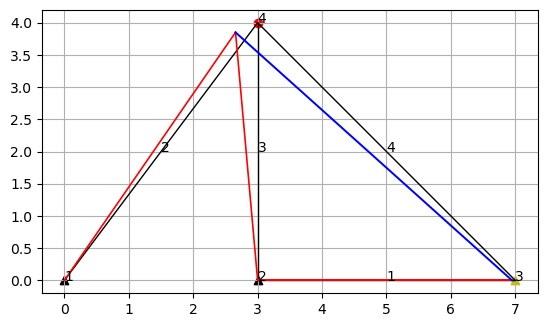

In [24]:
# Estructura sin aplicación de las cargas. Enumera las barras.
st.dibujar_barras(num=True)

# Nudos enumerados y en sus posiciones iniciales
# Triángulos para los apoyos
st.dibujar_nudos(num=True)

# Deformada amplificada. Azul: tracción; Rojo: compresión
st.dibujar_deform(amp=50, colorear=True, espesor_area=100)